# Recommendtion System for Ecommerce Shop

#### Importing packages

In [6]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


#### Data Importation

In [7]:

data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [8]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [9]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [10]:
#Shape of the data
data.shape

(2023070, 4)

In [11]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
data

In [12]:
data.tail()

,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [13]:
#checking for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Visualization

In [14]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

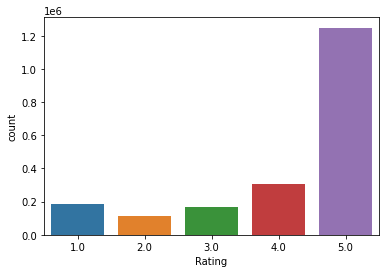

In [15]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [16]:
#How many users have given a particular rating
data.groupby('Rating')['UserId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### Data Preprocesing

In [17]:
#removing timestamp column because we don't need it.
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [18]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


In [19]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [20]:
#Reducing sample size
print(data.shape)
data = data.sample(n=10000)
data.shape


(2023070, 3)


(10000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

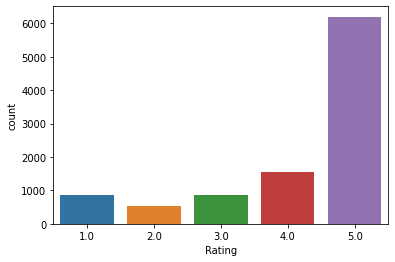

In [21]:
sns.countplot(x='Rating', data=data)

In [22]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.591837,49
B0043OYFKU,3.888889,18
B003V265QW,4.500000,14
B0000YUXI0,3.846154,13
B004OHQR1Q,4.750000,12
...,...,...
B008X9KKSM,5.000000,1
B008X4HBLQ,5.000000,1
B008X3PCU4,5.000000,1


<AxesSubplot:xlabel='ProductId'>

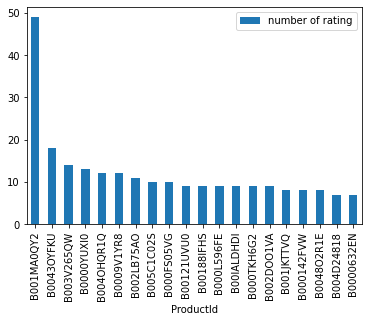

In [23]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

In [24]:
#Top 5 most popular products to be recommended to a new user
popular_products = rating[['number of rating']].sort_values('number of rating',ascending=False).head()
popular_products

,number of rating
ProductId,
B001MA0QY2,49
B0043OYFKU,18
B003V265QW,14
B0000YUXI0,13
B004OHQR1Q,12


### Machine Learning

In [25]:
#create a user item matrix. 
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId')
ratings_utility_matrix.head(10)

ProductId,1304196135,3227001381,9744434139,9759091062,978807894X,9790781687,9790781911,9790782055,9790782314,9790790392,...,B00KK6S52Y,B00KO6KP8M,B00KQBR9FM,B00KQVTX06,B00KWFDBKE,B00KYXSF00,B00L3KEIZO,B00L5JHZJO,B00L7BX4FE,B00L88S190
UserId,,,,,,,,,,,,,,,,,,,,,
A00088021N0VU5Z2UM73L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00700212KB3K0MVESPIY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01254332UU57MKWKP4VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01290231HW9YARUTSI41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A016255899ADBITA1BCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0177658F9O4Q4DWA24Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01907982I6OHXDYN5HD6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0191994UV5U2SSP5MHU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A02693342D4WEEY3LWSZ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ratings_utility_matrix.shape

(9893, 8168)

In [27]:
ratings_utility_matrix.fillna(0, inplace=True)

In [28]:
# Transpose the matrix
X = ratings_utility_matrix.T

In [29]:
X.head()

UserId,A00088021N0VU5Z2UM73L,A00700212KB3K0MVESPIY,A01254332UU57MKWKP4VI,A01290231HW9YARUTSI41,A016255899ADBITA1BCS,A0177658F9O4Q4DWA24Y,A01907982I6OHXDYN5HD6,A0191994UV5U2SSP5MHU,A02693342D4WEEY3LWSZ9,A02711901BLO4UDSSUSHR,...,AZW7X2PLVXNOU,AZWMKTYD39L6M,AZWO3LCN3SA0F,AZWO7P7YA54FP,AZWS8A9C91JWV,AZX79OGANBTHY,AZXA6A10XI271,AZXD1XHV4ZTKM,AZYDE7HDGCX9U,AZZJLO4BYM8WK
ProductId,,,,,,,,,,,,,,,,,,,,,
1304196135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3227001381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9744434139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9759091062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978807894X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X.shape

(8168, 9893)

#### Decomposing the matrix using TruncatedSVD, It is a dimensionality reduction technique.

In [31]:
from sklearn.decomposition import TruncatedSVD

In [32]:
#n_component is desired dimension of output data
SVD = TruncatedSVD(n_components=10) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[ 2.59911174e-09,  3.32665187e-06, -9.45603214e-07, ...,
        -4.53594580e-05, -1.41807427e-05, -7.60164534e-06],
       [ 1.48474844e-09, -9.84545741e-07, -6.88032919e-08, ...,
         3.80923544e-05, -3.62434020e-05, -4.58034680e-05],
       [-4.45034590e-19, -6.72200120e-15, -1.06794603e-15, ...,
         1.70527773e-14, -1.38527787e-13, -2.69800449e-14],
       ...,
       [-2.24235506e-06, -1.05673714e-03, -3.99631849e-04, ...,
         2.85716518e-02, -1.63138243e-02, -1.86364455e-02],
       [-5.88942816e-10, -2.78029318e-06, -7.87142194e-07, ...,
         1.02058010e-05,  4.67626232e-05,  1.10412724e-05],
       [-2.53528516e-09, -4.03003339e-07,  9.77963349e-07, ...,
         4.45740301e-05, -6.25811897e-06,  3.80022706e-05]])

In [33]:
decomposed_matrix.shape

(8168, 10)

In [34]:
#corrcoef() returns the correlation matrix with correlation coefficient in it. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.48326961, -0.06590066, ..., -0.4059176 ,
        -0.47609579, -0.66947947],
       [-0.48326961,  1.        ,  0.66082999, ...,  0.82342316,
        -0.2502196 ,  0.1640549 ],
       [-0.06590066,  0.66082999,  1.        , ...,  0.55315678,
        -0.73044138,  0.36822575],
       ...,
       [-0.4059176 ,  0.82342316,  0.55315678, ...,  1.        ,
        -0.41756285,  0.30343327],
       [-0.47609579, -0.2502196 , -0.73044138, ..., -0.41756285,
         1.        , -0.0397149 ],
       [-0.66947947,  0.1640549 ,  0.36822575, ...,  0.30343327,
        -0.0397149 ,  1.        ]])

In [35]:
correlation_matrix.shape

(8168, 8168)

In [36]:
#choose a random index
import random
i = random.randint(0,correlation_matrix.shape[0])
i

7972

In [37]:
#The Product ID of the product the customer purchased
product_ID = X.index[i]
product_ID

'B00GX8H59C'

'B005GHP5UC

In [ ]:
#All the correlation of those products which are correlated to the product that customer purchase
correlation_ProductId = correlation_matrix[i]

correlation_ProductId

array([-0.42841073, -0.00597   ,  0.3286946 , ...,  0.31918284,
       -0.43100097, -0.10299295])

In [ ]:
#Top products to be displayed by the recommendation system to the above customer based on the purchase history of other cutomers on website
recommended_products = X.index[correlation_ProductId > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['B0000536EK',
 'B0007CXXJQ',
 'B0009OAI6I',
 'B0009XH6SC',
 'B000C1W5GY',
 'B000C1Z7BY',
 'B000EBOU0Q',
 'B000MGSJBY',
 'B000NVSVMK',
 'B000OYNCES']